# A Random Forests Approach to Predicting Clean Energy

### By Perry Sadorsky
https://www.mdpi.com/1911-8074/14/2/48\

The paper implements a random forest model and decision tree bagging to predict the price direction of clean energy stocks. It states that the prediction accuracy of the decision trees and random forest models is around 85%-90% when using common technical indicators in a **20-day forecast horizon.**

It compares the random forest (RF) and decision tree (DT) models to logint and setp-wise logit models and shows that RF and DT significantly outpeform logint in their ability to forecast clean energy stock prices.

The feature set chose for this comparison is built from the following technical indicators: 

```
Relative Strength Indicator
Fast & Slow Stochastic Oscillator
Advance-Decline Line
MACD
Price Rate of Change
Oh Balance Volume
200-day moving average
```
All Indicators are calculated using daily price data.

The response vector is xxxxx

The paper uses data collected from the following clean energy ETFs:
```
PBW
ICLN
QCLN
TAN
FAN
```
Can we replicate the performances of the models described in the paper (QCLN accuracy for example):
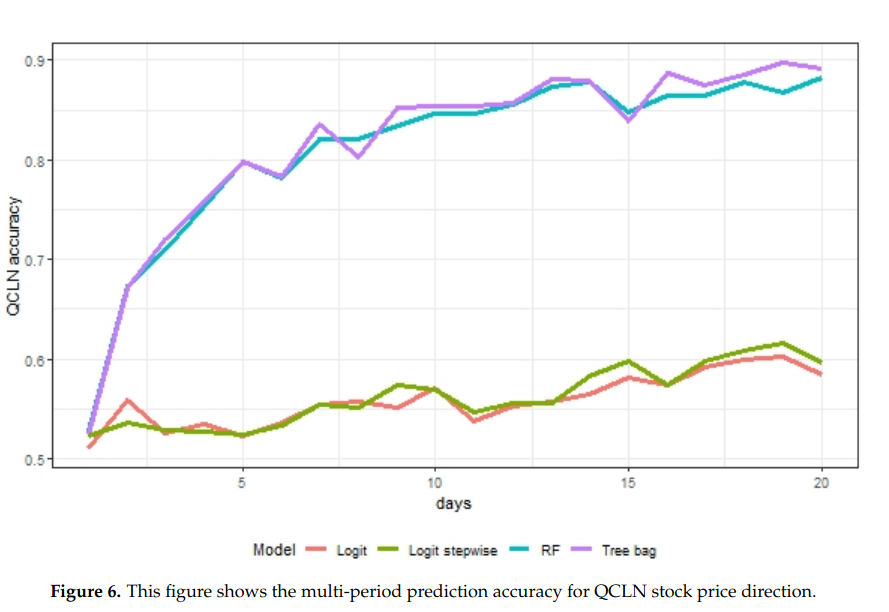

## Raw Data Extraction:

In [2]:
# Imporitng Data extraction and transformation packages:
import pandas as pd
import yfinance as yf

# Visualization Packages: 
import matplotlib.pyplot as plt

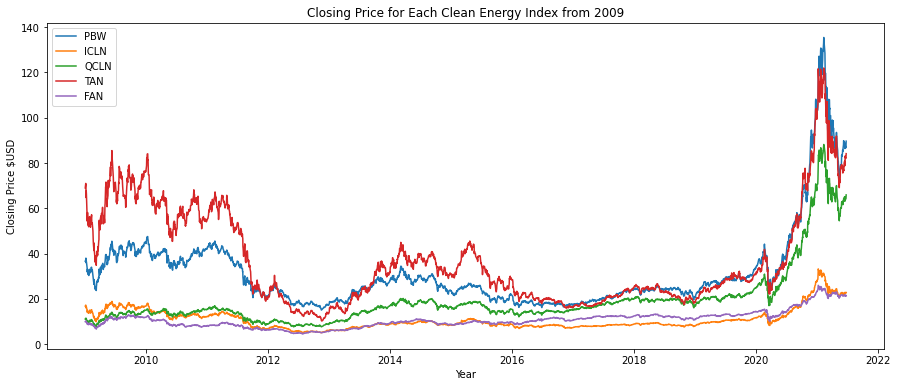

In [9]:
# Extracting the clean energy ETF database price data:
PBW_ohlc = yf.Ticker("PBW").history(start="2009-01-01")
ICLN_ohlc = yf.Ticker("ICLN").history(start="2009-01-01")
QCLN_ohlc = yf.Ticker("QCLN").history(start="2009-01-01")
TAN_ohlc = yf.Ticker("TAN").history(start="2009-01-01")
FAN_ohlc = yf.Ticker("FAN").history(start="2009-01-01")

plt.figure(figsize=(15,6))
price_timeseries_index = PBW_ohlc.index

# Plotting the Closing prices of indicies:
plt.plot(price_timeseries_index, PBW_ohlc["Close"], label="PBW")
plt.plot(price_timeseries_index, ICLN_ohlc["Close"], label="ICLN")
plt.plot(price_timeseries_index, QCLN_ohlc["Close"], label="QCLN")
plt.plot(price_timeseries_index, TAN_ohlc["Close"], label="TAN")
plt.plot(price_timeseries_index, FAN_ohlc["Close"], label="FAN")
plt.title("Closing Price for Each Clean Energy Index from 2009")
plt.xlabel("Year")
plt.ylabel("Closing Price $USD")
plt.legend()

etf_lst = [PBW_ohlc, ICLN_ohlc, QCLN_ohlc, TAN_ohlc, FAN_ohlc]

Date
2009-01-02         NaN
2009-01-05    1.764087
2009-01-06    1.950190
2009-01-07   -5.313528
2009-01-08    2.020188
                ...   
2021-06-17    0.658184
2021-06-18   -1.048474
2021-06-21   -0.964419
2021-06-22    0.703820
2021-06-23    2.692482
Name: Daily_PCT_Change, Length: 3140, dtype: float64


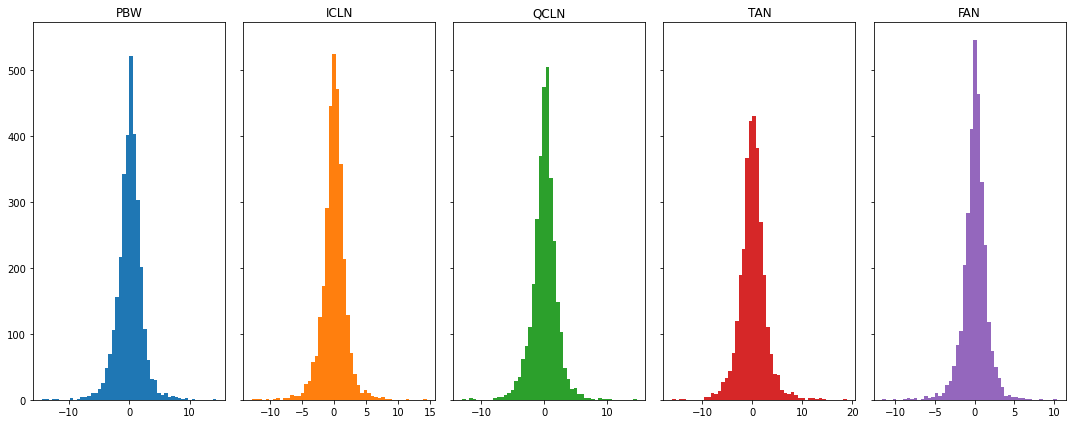

In [29]:
# Lazy for labeling purposes:
etf_labels = ["PBW", "ICLN", "QCLN", "TAN", "FAN"]
colors = plt.rcParams["axes.prop_cycle"]()

# Calculating the daily percent change for each ETF:
def add_pct_change_col(df):
    df["Daily_PCT_Change"] = df["Close"].pct_change()*100
    return df

etf_lst = [add_pct_change_col(etf_df) for etf_df in etf_lst]

# Plotting the daily price changes for the ETFs:
fig, axs = plt.subplots(1, 5, sharey=True, tight_layout=True, figsize=(15,6))

for i in range(0,5):
    c = next(colors)["color"]
    axs[i].set_title(etf_labels[i])
    axs[i].hist(etf_lst[i]["Daily_PCT_Change"], bins=50, color=c) 
    
print(etf_lst[0]["Daily_PCT_Change"])

In [ ]:
# 